# Download the example data from [here](https://drive.google.com/file/d/1lrFcbhEVTfcVyL8pxSE36QT0Fl72l5gT) and unzip it
# Then you can run the notebook assuming the file paths are the same

In [1]:
import umndet.common.helpers as hp
import gzip
import matplotlib.pyplot as plt
import datetime
import os

%config InlineBackend.figure_format = 'retina'

## Loading in the data

In [2]:
hafx_data = []
health_data = []

data_folder = "nominal"
for fn in sorted(os.listdir(data_folder)):
    full_fn = f"{data_folder}/{fn}"
    if fn.startswith("detector-health"):
        health_data += hp.read_det_health(full_fn, gzip.open)
    elif fn.startswith("hafx-time-slice"):
        hafx_data += hp.read_hafx_sci(full_fn, gzip.open)

## Example plotting some pieces of the health data

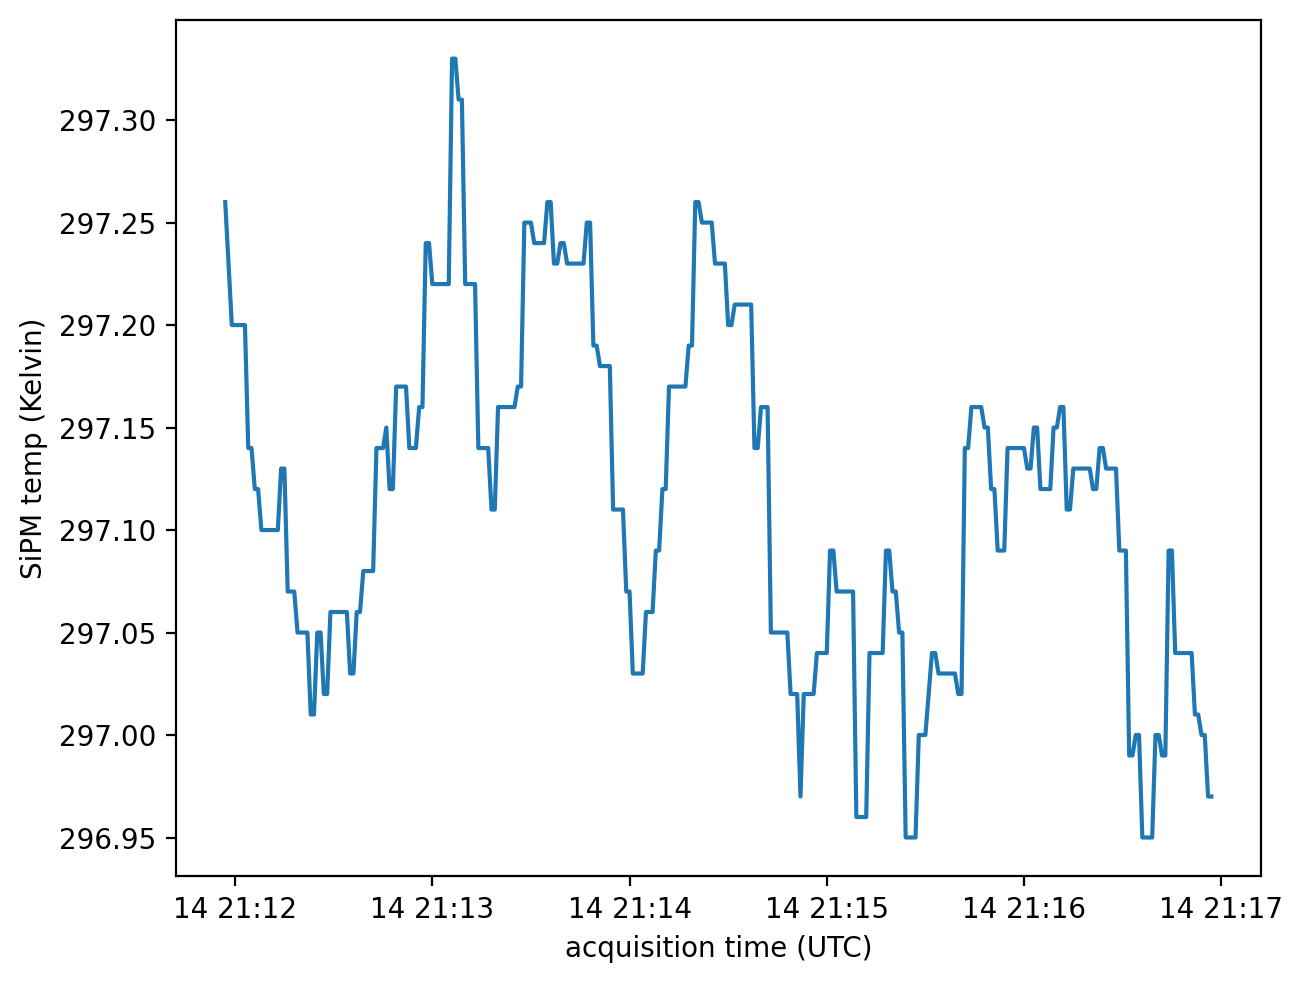

In [3]:
sipm_temps = [hd.c1.sipm_temp / 100 for hd in health_data]
times = [
    datetime.datetime.fromtimestamp(hd.timestamp, tz=datetime.timezone.utc)
    for hd in health_data
]
fig, ax = plt.subplots(layout="constrained")
ax.plot(times, sipm_temps)
ax.set(xlabel="acquisition time (UTC)", ylabel="SiPM temp (Kelvin)")
plt.show()

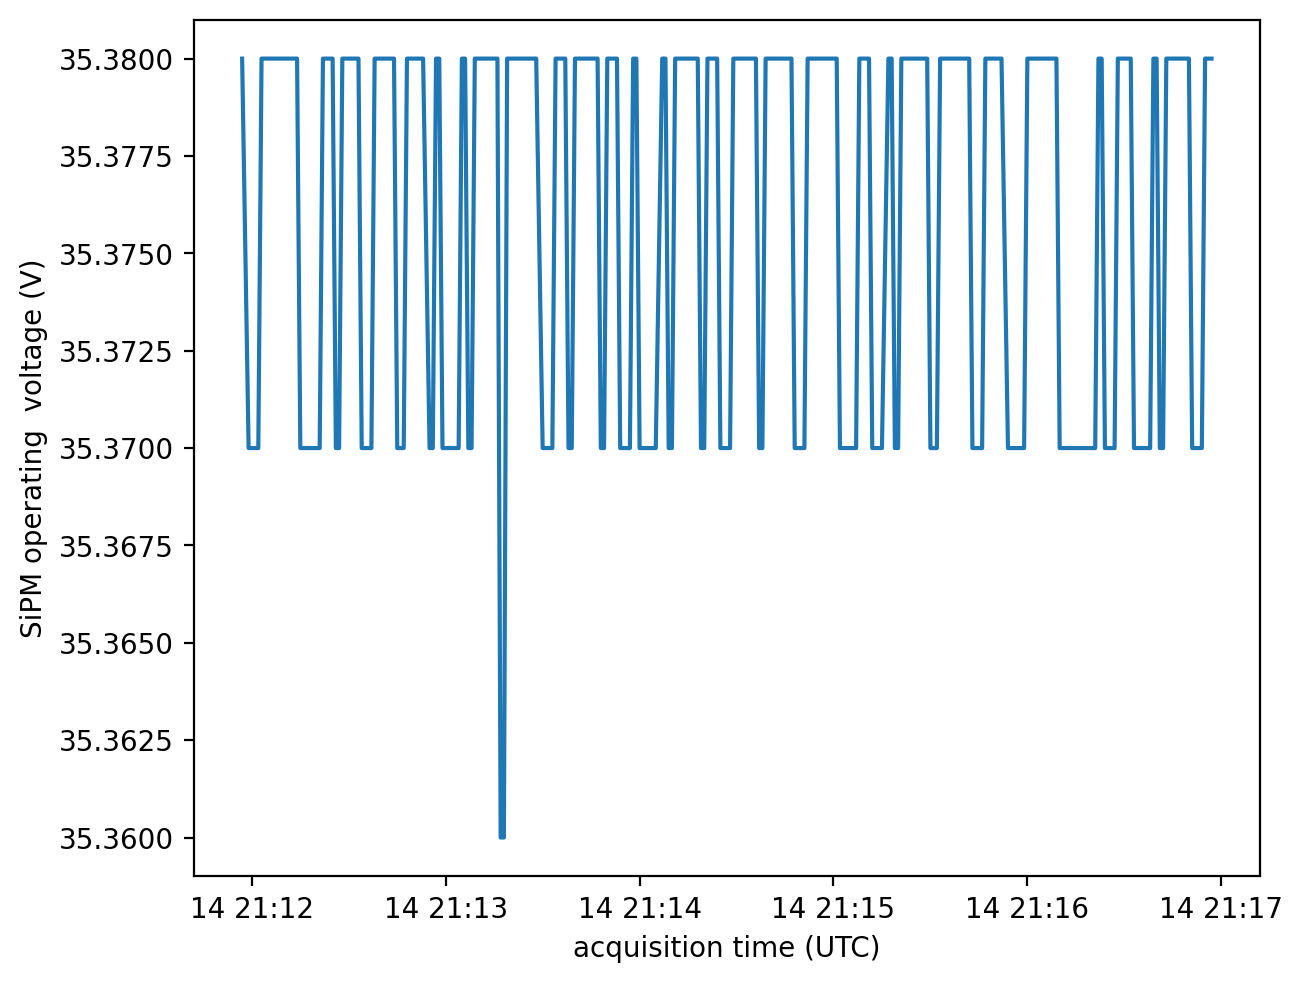

In [4]:
sipm_volts = [hd.c1.sipm_operating_voltage / 100 for hd in health_data]
fig, ax = plt.subplots(layout="constrained")
ax.plot(times, sipm_volts)
ax.set(xlabel="acquisition time (UTC)", ylabel="SiPM operating  voltage (V)")
plt.show()

# Look at a spectrogram over time of counts data acquired over ~5 minutes

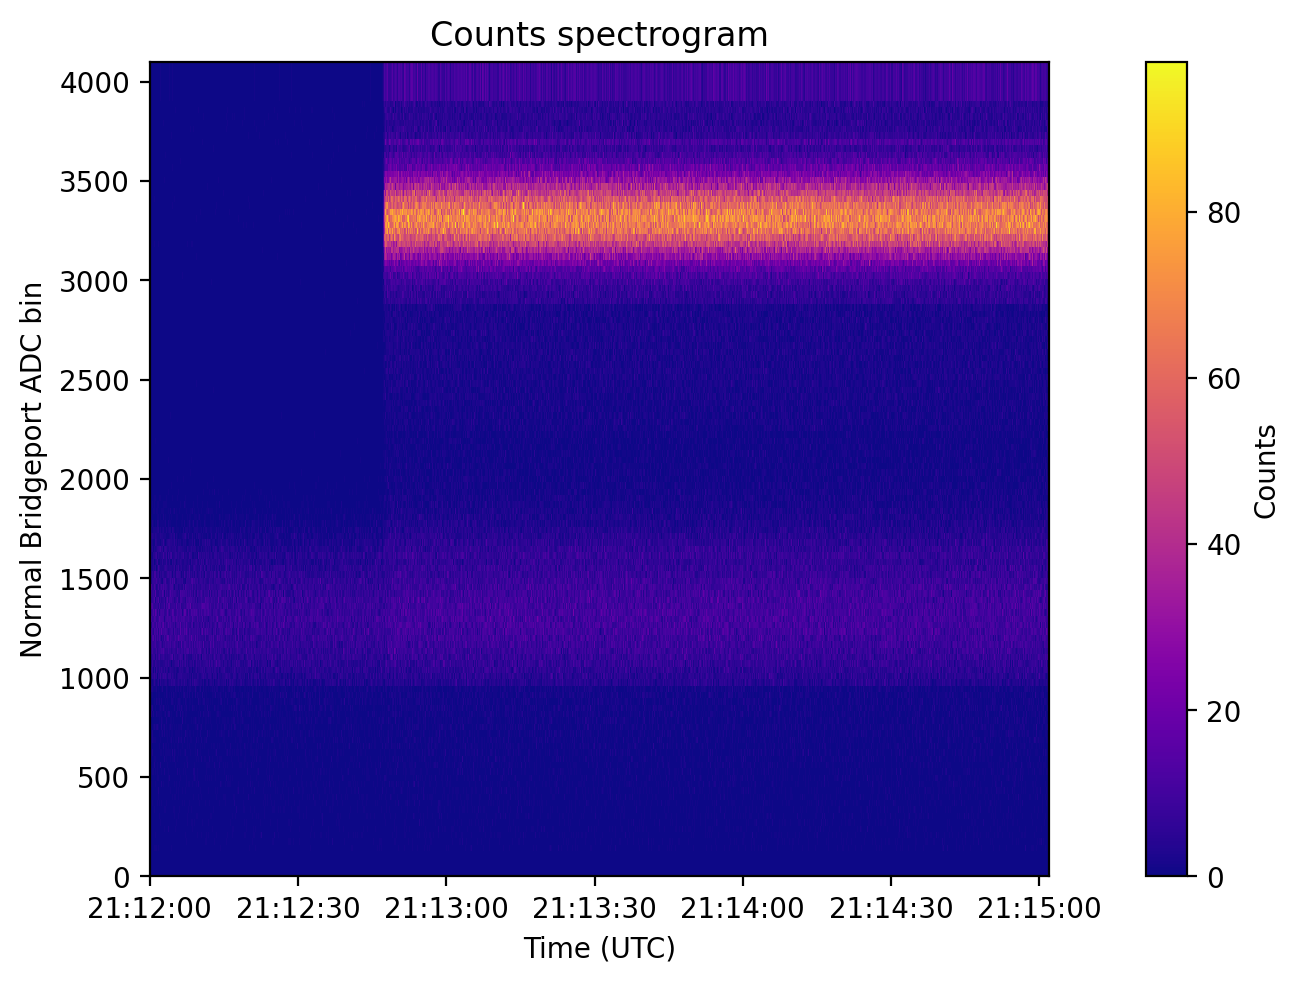

In [5]:
import umndet.plotting as pl
import importlib

importlib.reload(pl)

fig, ax = plt.subplots(layout="constrained")
_, _, pcm = pl.plot_raw_time_slice_spectrogram(
    hafx_data,
    fig=fig,
    ax=ax,
)
fig.set_constrained_layout(True)
fig.colorbar(pcm, label="Counts")

### You can clearly see when I introduced the Bi207 source in the data. Cool!